In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
# 옷 데이터
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_input.shape

(60000, 28, 28)

In [6]:
test_input.shape

(10000, 28, 28)

In [7]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

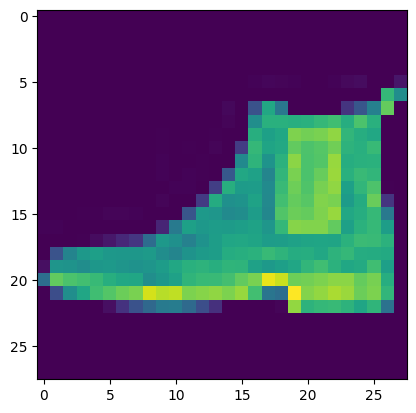

In [8]:
import matplotlib.pyplot as plt

plt.imshow(train_input[3])

In [9]:
train_target[3]

9

In [16]:
# 픽셀값 0~255 / 0에 가까울수록 검은색, 255에 가까울수록 흰색

train_scaled = train_input.reshape(-1, 784) / 255
val_scaled = val_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

In [11]:
train_scaled.shape

(54000, 784)

In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dropout(0.3)) # 이 은닉층의 30%는 랜덤으로 끄겠다
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# 5번 연속 나빠지면 학습 강제종료, 마지막 5번은 삭제한다. -> 좋은 모델을 만들기 위함
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
cp = keras.callbacks.ModelCheckpoint('best.h5')

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam') # 학습률 조정

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target), callbacks = [es,cp])

Epoch 1/30
1688/1688 [==============================] - 12s 6ms/step - loss: 0.5879 - accuracy: 0.7888 - val_loss: 0.4112 - val_accuracy: 0.8450
Epoch 2/30
  29/1688 [..............................] - ETA: 9s - loss: 0.5226 - accuracy: 0.8017

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1688/1688 [==============================] - 11s 6ms/step - loss: 0.4426 - accuracy: 0.8410 - val_loss: 0.3750 - val_accuracy: 0.8602
Epoch 3/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4048 - accuracy: 0.8536 - val_loss: 0.3512 - val_accuracy: 0.8663
Epoch 4/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3862 - accuracy: 0.8583 - val_loss: 0.3293 - val_accuracy: 0.8787
Epoch 5/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3698 - accuracy: 0.8660 - val_loss: 0.3182 - val_accuracy: 0.8798
Epoch 6/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3576 - accuracy: 0.8701 - val_loss: 0.3118 - val_accuracy: 0.8825
Epoch 7/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3462 - accuracy: 0.8731 - val_loss: 0.3088 - val_accuracy: 0.8840
Epoch 8/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3394 - accuracy: 0.8752 - val_loss: 0.3062 - val_accuracy: 0.88

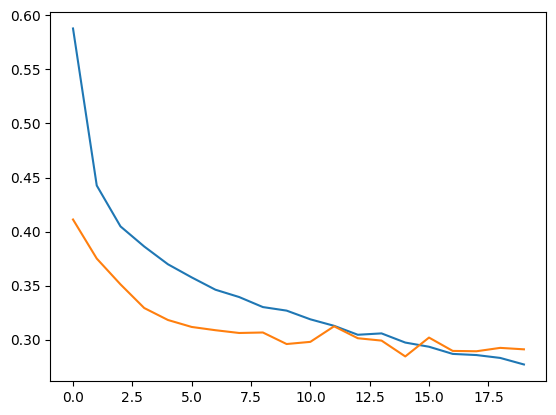

In [19]:
# prompt:

model.summary()
